In [93]:
import xarray as xr
import numpy as np
import my_functions
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os

In [98]:
os.chdir('/Users/marie-louisekorte/Documents/Uni Leipzig/Lisbon/')
SSH = xr.open_dataset('Data.nosync/SSH.nc')

In [100]:
SSH = my_functions.add_week_and_month(SSH)

In [101]:
SSH

<xarray.Dataset> Size: 2GB
Dimensions:       (latitude: 121, longitude: 169, time: 10589)
Coordinates:
  * latitude      (latitude) float32 484B 35.0 35.08 35.17 ... 44.83 44.92 45.0
  * longitude     (longitude) float32 676B -19.0 -18.92 -18.83 ... -5.083 -5.0
  * time          (time) datetime64[ns] 85kB 1993-01-01 ... 2021-12-28
Data variables:
    zos           (time, latitude, longitude) float64 2GB ...
    week_of_year  (time) int64 85kB 53 53 53 1 1 1 1 1 ... 51 51 51 51 51 52 52
    month         (time) <U32 1MB 'Drop_53' 'Drop_53' 'Drop_53' ... 'Dec' 'Dec'

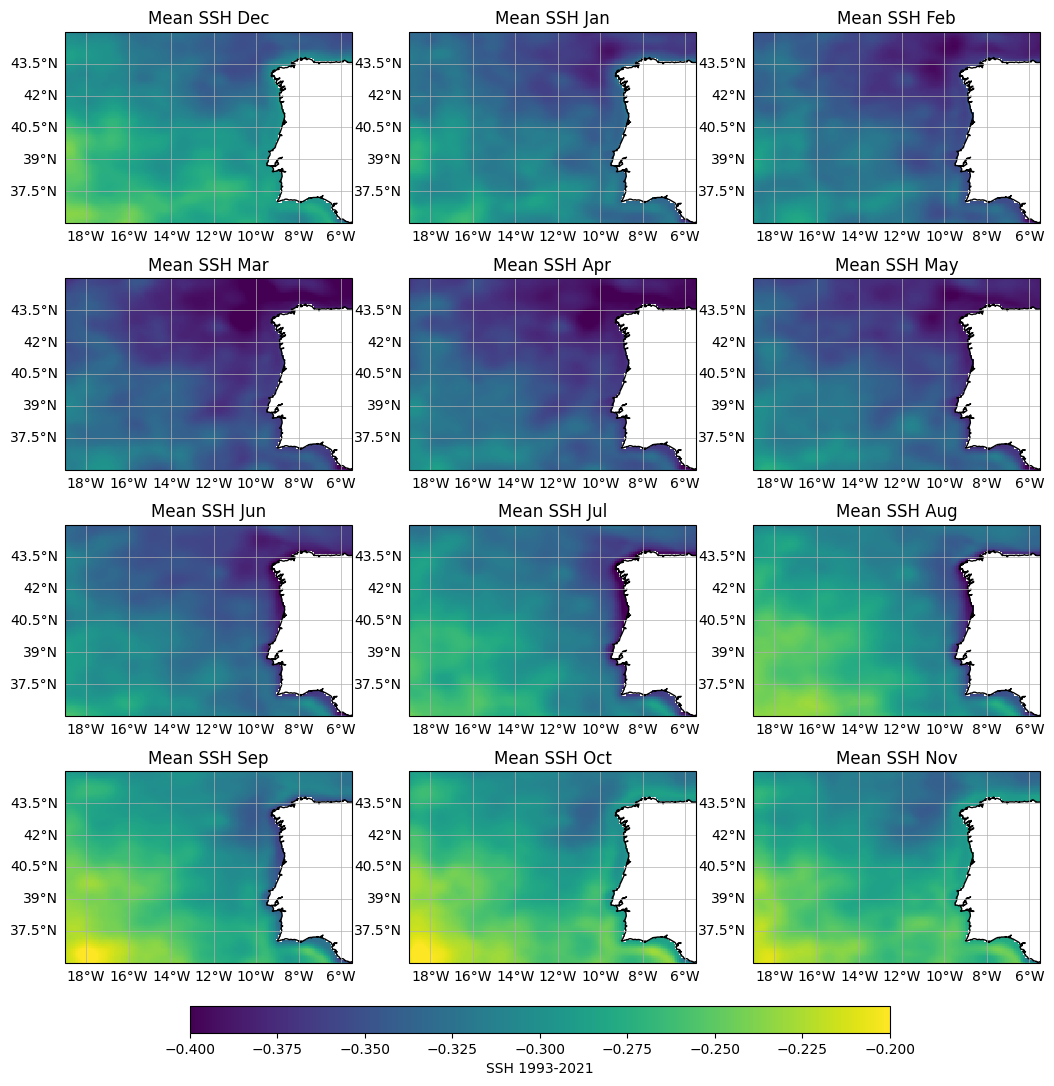

In [102]:
xsize = 4 # is actually the number of rows
ysize = 3 # is the number of collumns
fig, axs = plt.subplots(xsize, ysize, figsize = (10, 9), subplot_kw={'projection': ccrs.PlateCarree()})

months = ['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
i = 0

for x in np.arange(0, xsize):
    for y in np.arange(0, ysize):
        
        ax = axs[x, y]
        
        ax.set_extent([-19, -5.5, 45, 36])
        ax.coastlines()
        gls = ax.gridlines(draw_labels=True, linewidth = 0.5)
        gls.top_labels = False 
        gls.right_labels = False
        
        
        cp = SSH.zos.where(SSH.month == months[i], drop = True).mean(dim = 'time').plot(ax = axs[x, y], transform = ccrs.PlateCarree(), add_colorbar = False, vmin = -0.4, vmax = -0.2, extend = 'both')
        ax.set_title(f'Mean SSH {months[i]}')
        ax.set_xlabel('Longitude [°E]')
        ax.set_ylabel('Latitude [°N]')

        i = i + 1

# adjust spacing around subplots (because fig.tight_layout() doesn't work with the method I use to add the colorbar
plt.subplots_adjust(bottom=0.5, right=1.1, top=1.3)

fig.subplots_adjust(bottom = 0.25)
cbar_ax = fig.add_axes([0.25, 0.18, 0.7, 0.03])
fig.colorbar(cp, cax=cbar_ax, orientation = 'horizontal', label = 'SSH 1993-2021')

fig.savefig('Iberian_Coast_Upwelling/Figures/SSH_monthly_mean.png', dpi = 300, bbox_inches = 'tight')